# Marketing Data EDA (Univariate + Bivariate)

## Objective
Perform structured univariate and bivariate analysis on the given marketing dataset.
Univariate analysis studies one variable at a time (distribution + summary). [web:14]
Bivariate analysis studies relationships between exactly two variables. [web:25]

## Notebook checklist
- Univariate analysis
  - Numerical (non-visual + visual)
  - Categorical (non-visual + visual)
- Bivariate analysis
  - Numerical vs Numerical
  - Numerical vs Categorical
  - Categorical vs Categorical


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.set_option("display.max_columns", 200)
sns.set_theme(style="whitegrid")

In [ ]:
# 2) Load dataset (edit path if needed)
DATA_PATH = Path("/content/drive/MyDrive/161225_task_marketingData/marketing_data.csv")

df = pd.read_csv(DATA_PATH)
df.shape
df.head()

(2240, 28)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain


In [ ]:
# 3) Quick overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# 4) Standardize column names (fix leading/trailing spaces)
df.columns = df.columns.str.strip()
df.columns.tolist()


['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

In [ ]:
# 5) Basic data quality checks
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct}).head(15)


,missing_count,missing_pct
Income,24,1.071429
ID,0,0.000000
Education,0,0.000000
Year_Birth,0,0.000000
Marital_Status,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000
MntWines,0,0.000000


In [ ]:
# 6) Duplicates
df.duplicated().sum()


np.int64(0)

In [ ]:
# 7) Parse date column (if present)
if "Dt_Customer" in df.columns:
    df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors="coerce")

df[["Dt_Customer"]].head() if "Dt_Customer" in df.columns else "Dt_Customer not found"


,Dt_Customer
0,2014-06-16
1,2014-06-15
2,2014-05-13
3,2014-05-11
4,2014-04-08


In [ ]:
# 8) Feature engineering (optional but useful for analysis)
# Age (approx): uses current year; adjust if your task requires a specific reference date.
if "Year_Birth" in df.columns:
    current_year = pd.Timestamp.today().year
    df["Age"] = current_year - df["Year_Birth"]

# Total children at home
if {"Kidhome", "Teenhome"}.issubset(df.columns):
    df["ChildrenAtHome"] = df["Kidhome"] + df["Teenhome"]

# Total spend across product categories (if available)
spend_cols = [c for c in ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"] if c in df.columns]
if spend_cols:
    df["TotalSpend"] = df[spend_cols].sum(axis=1)

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,ChildrenAtHome,TotalSpend
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain,55,0,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada,64,0,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA,67,1,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia,58,2,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain,36,1,91


# Univariate Analysis (Numerical)

Univariate numerical analysis typically includes summary stats (mean/median/std) and distribution plots (histogram/boxplot). [web:14]


In [ ]:
# 9) Identify numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

num_cols, cat_cols


(['ID',
  'Year_Birth',
  'Income',
  'Kidhome',
  'Teenhome',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Response',
  'Complain',
  'Age',
  'ChildrenAtHome',
  'TotalSpend'],
 ['Education', 'Marital_Status', 'Dt_Customer', 'Country'])

In [ ]:
# 10) Summary statistics (numerical)
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
# 11) Helper: histogram + boxplot for a numeric feature
def plot_numeric_univariate(data, col, bins=30):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data[col], bins=bins, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} - Histogram")

    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show();

# Choose important numeric columns (edit as needed)
priority_num = [c for c in ["Income", "Age", "Recency", "TotalSpend", "NumWebVisitsMonth"] if c in df.columns]
priority_num


['Income', 'Age', 'Recency', 'TotalSpend', 'NumWebVisitsMonth']

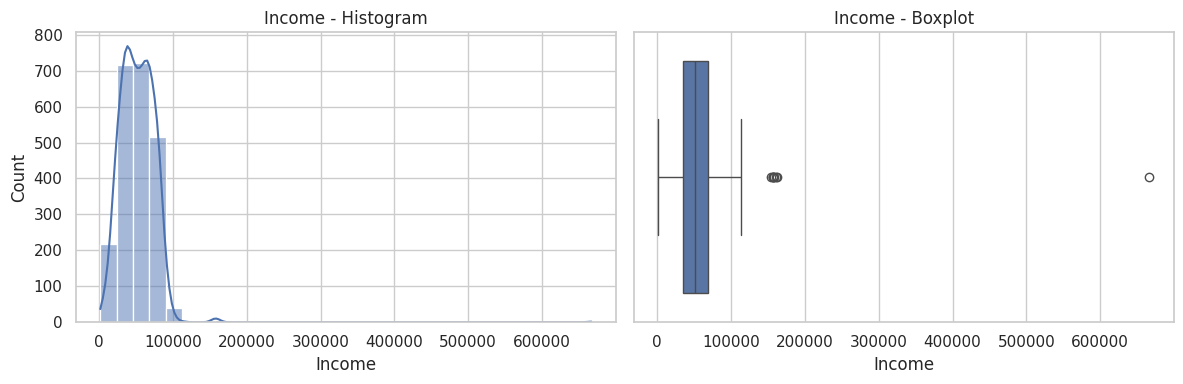

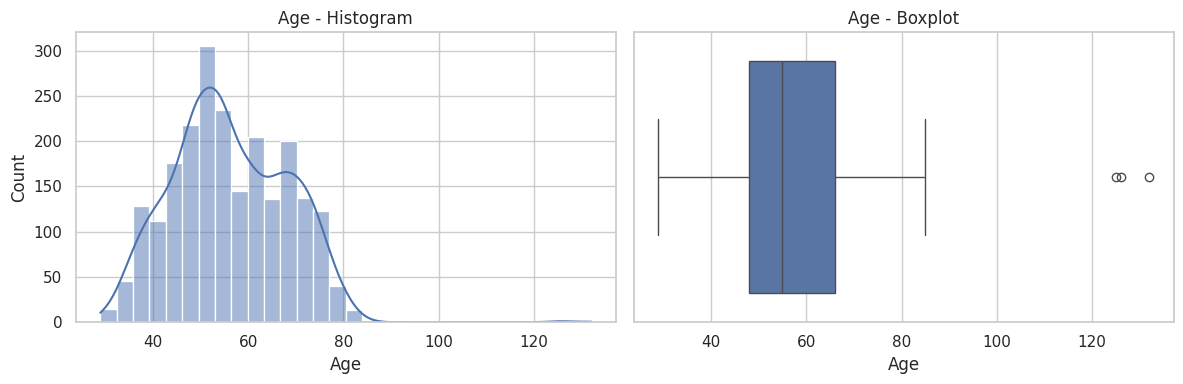

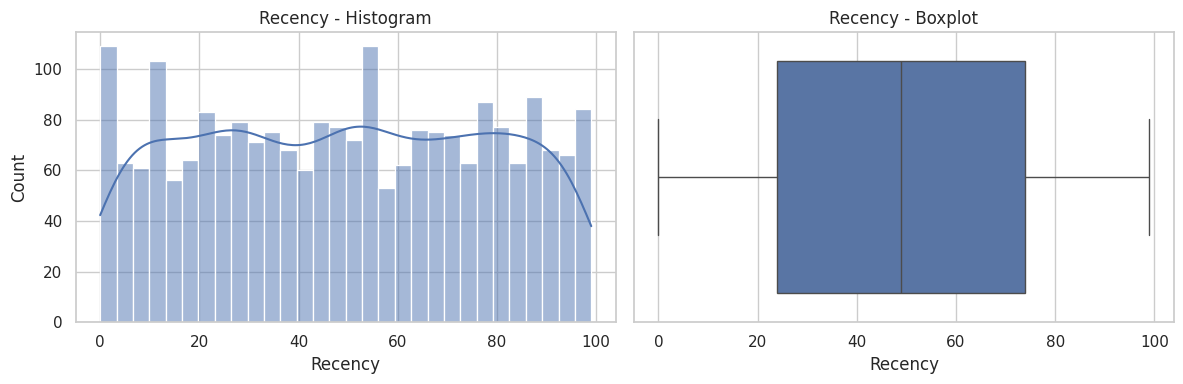

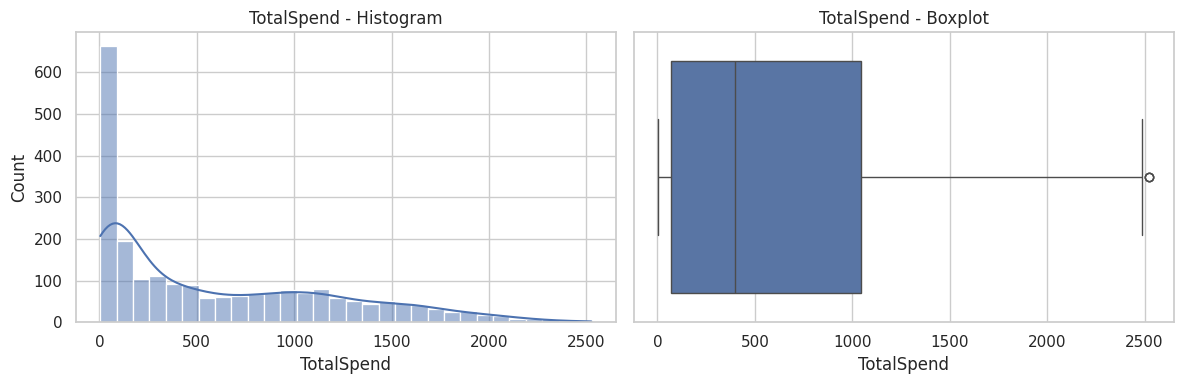

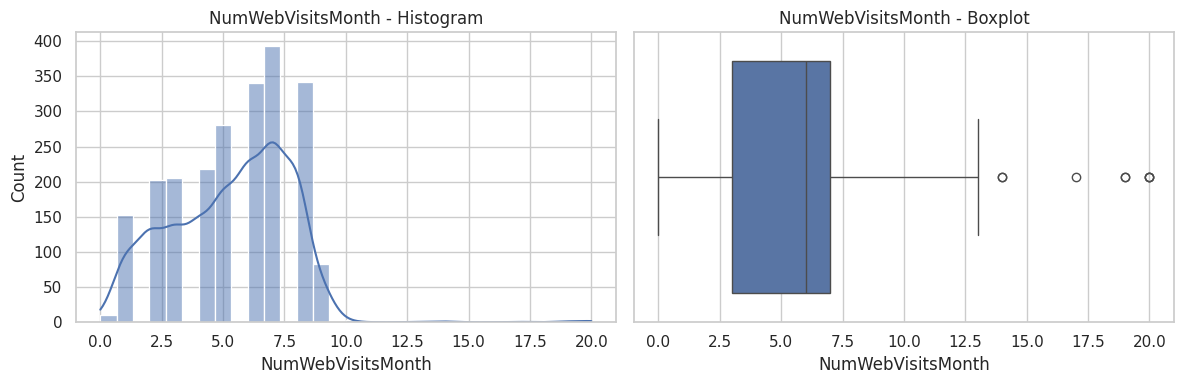

In [ ]:
# 12) Plot univariate distributions for priority numeric columns
for c in priority_num:
    plot_numeric_univariate(df, c)


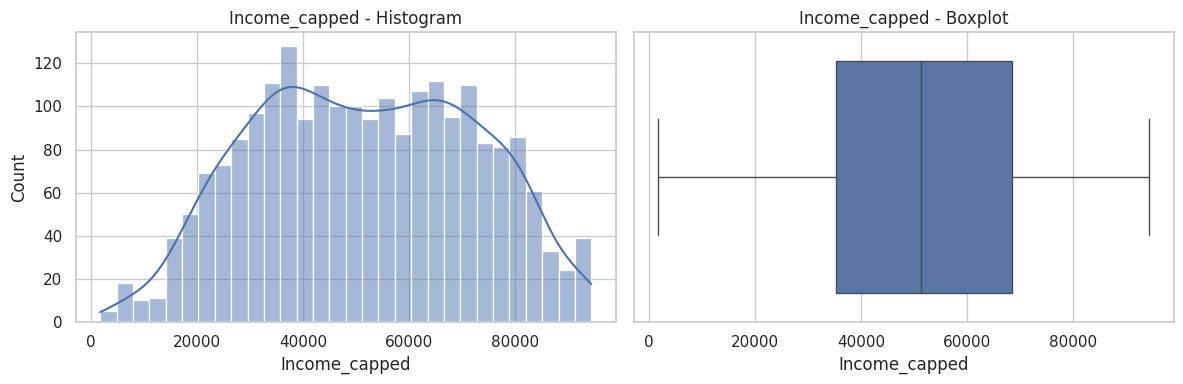

In [ ]:
# 13) Optional: handle extreme Income outliers for clearer visualization (EDA-only copy)
df_viz = df.copy()

if "Income" in df_viz.columns:
    # cap at 99th percentile to reduce the impact of extreme outliers
    cap = df_viz["Income"].quantile(0.99)
    df_viz["Income_capped"] = df_viz["Income"].clip(upper=cap)

    plot_numeric_univariate(df_viz, "Income_capped")


# Univariate Analysis (Categorical)

Univariate categorical analysis includes frequency tables and bar charts to show class imbalance and dominant categories. [web:14]


In [ ]:
# 14) Frequency tables for categorical columns
for c in cat_cols:
    print(f"\n=== {c} ===")
    display(df[c].value_counts(dropna=False).head(20))



=== Education ===


,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54



=== Marital_Status ===


,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
YOLO,2
Absurd,2



=== Dt_Customer ===


,count
Dt_Customer,
2012-08-31,12
2014-05-12,11
2012-09-12,11
2013-02-14,11
2013-08-20,10
2014-05-22,10
2014-03-01,9
2013-01-02,9
2012-10-29,9



=== Country ===


,count
Country,
Spain,1095
Saudi Arabia,337
Canada,268
Australia,160
India,148
Germany,120
USA,109
Mexico,3


<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Education', ylabel='count'>

Text(0.5, 1.0, 'Education - Count Plot')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Graduation'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Master'),
  Text(3, 0, '2n Cycle'),
  Text(4, 0, 'Basic')])

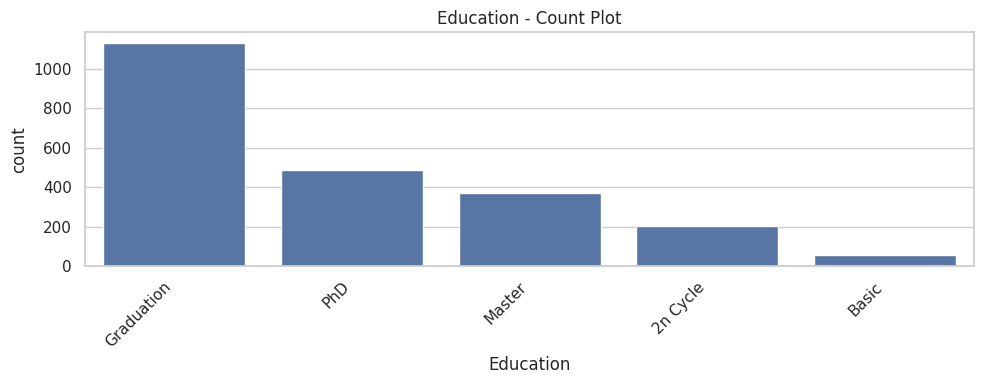

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Marital_Status', ylabel='count'>

Text(0.5, 1.0, 'Marital_Status - Count Plot')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Together'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widow'),
  Text(5, 0, 'Alone'),
  Text(6, 0, 'YOLO'),
  Text(7, 0, 'Absurd')])

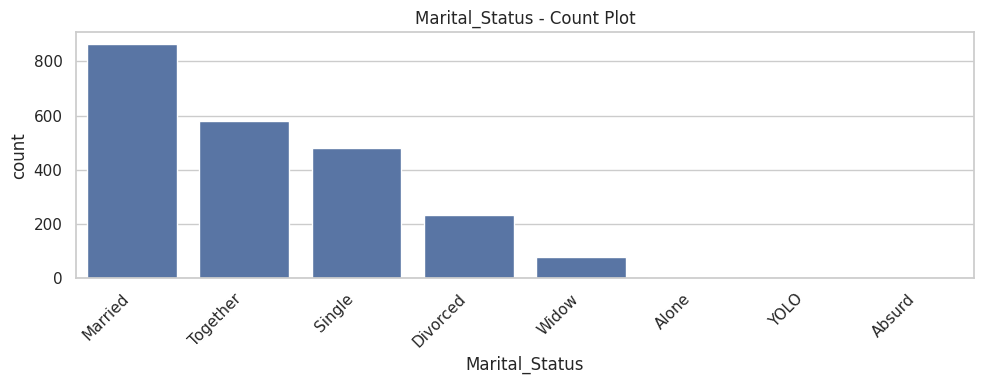

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Country', ylabel='count'>

Text(0.5, 1.0, 'Country - Count Plot')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Spain'),
  Text(1, 0, 'Saudi Arabia'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'USA'),
  Text(7, 0, 'Mexico')])

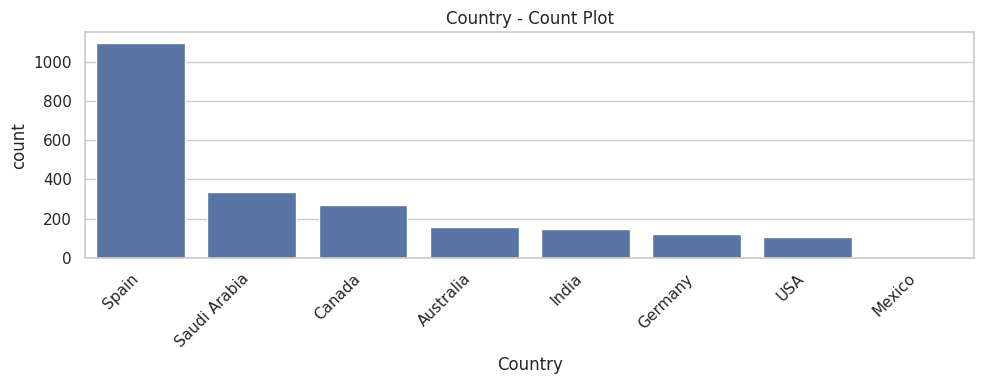

In [ ]:
# 15) Bar plots for key categorical variables (edit list as needed)
key_cat = [c for c in ["Education", "Marital_Status", "Country"] if c in df.columns]

for c in key_cat:
    plt.figure(figsize=(10, 4))
    order = df[c].value_counts().index
    sns.countplot(data=df, x=c, order=order)
    plt.title(f"{c} - Count Plot")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# Bivariate Analysis (Numerical vs Numerical)

Bivariate numerical relationships are commonly explored with scatter plots and correlation heatmaps. [web:25]


<Figure size 1400x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap (Numerical Features)')

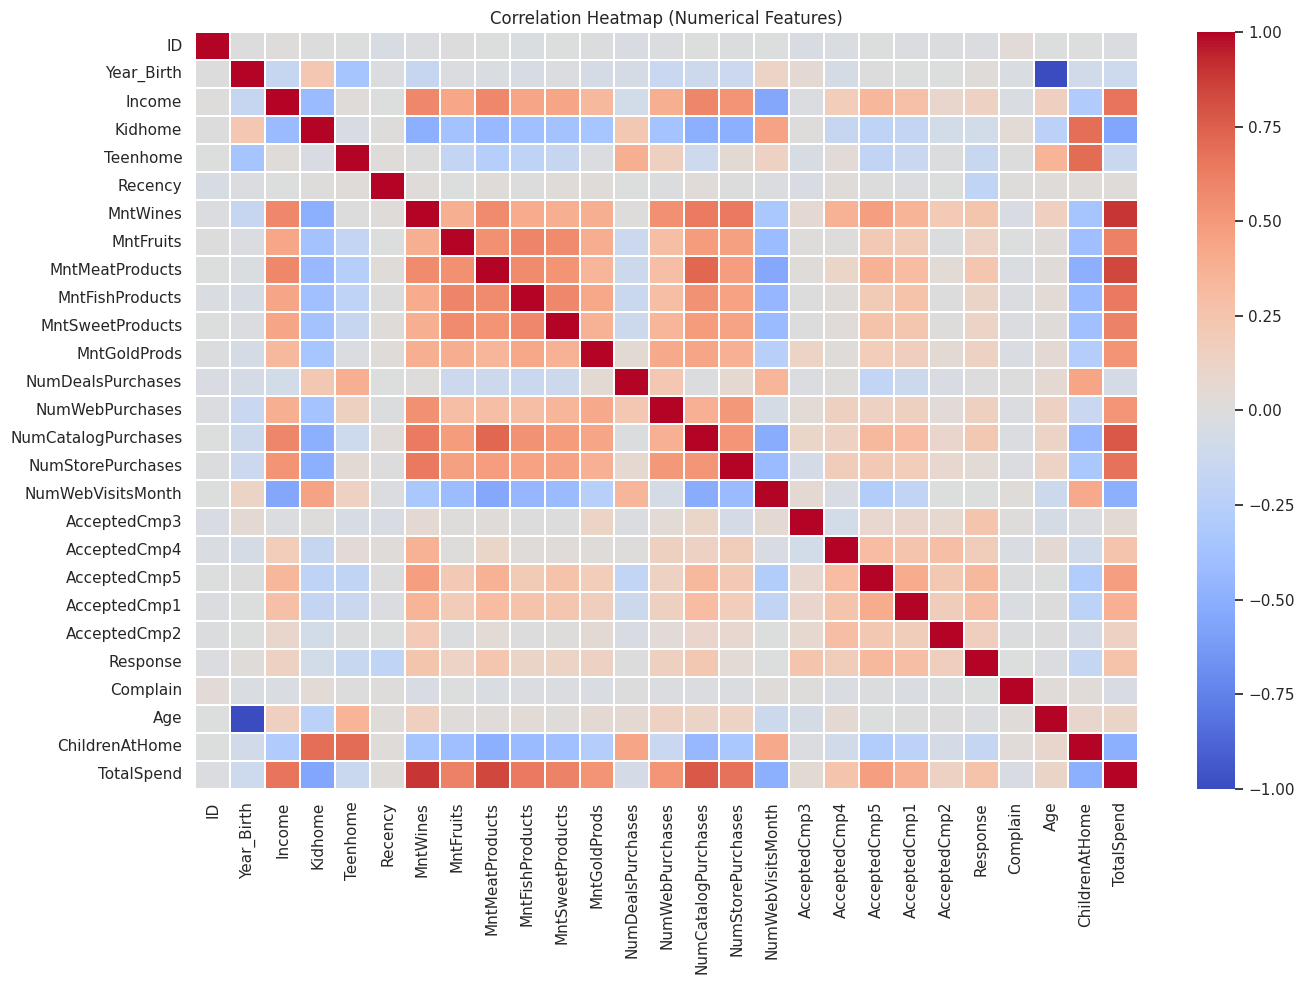

In [ ]:
# 16) Correlation heatmap (numerical)
plt.figure(figsize=(14, 10))
corr = df[num_cols].corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.2)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Income', ylabel='TotalSpend'>

Text(0.5, 1.0, 'TotalSpend vs Income')

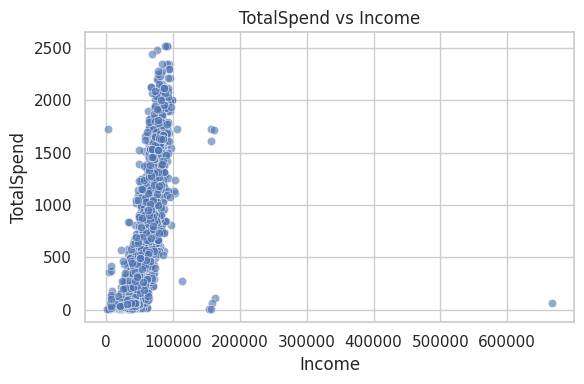

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Recency', ylabel='TotalSpend'>

Text(0.5, 1.0, 'TotalSpend vs Recency')

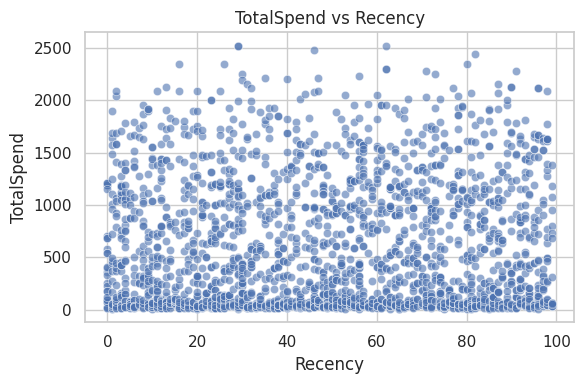

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Age', ylabel='TotalSpend'>

Text(0.5, 1.0, 'TotalSpend vs Age')

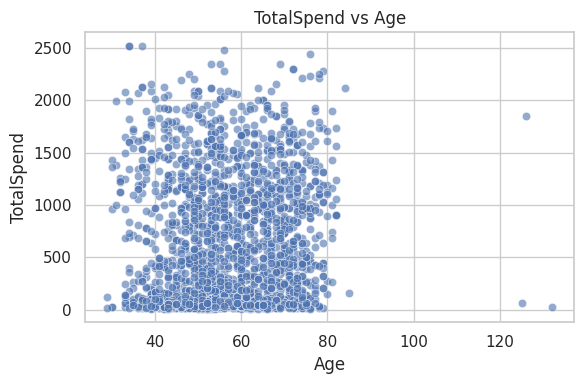

In [ ]:
# 17) Focused scatter plots (edit pairs as needed)
pairs = []
if {"Income", "TotalSpend"}.issubset(df.columns): pairs.append(("Income", "TotalSpend"))
if {"Recency", "TotalSpend"}.issubset(df.columns): pairs.append(("Recency", "TotalSpend"))
if {"Age", "TotalSpend"}.issubset(df.columns): pairs.append(("Age", "TotalSpend"))

for x, y in pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    plt.title(f"{y} vs {x}")
    plt.tight_layout()
    plt.show()


# Bivariate Analysis (Numerical vs Categorical)

These plots compare distributions of a numerical variable across categories (boxplot/violin) and help spot group differences. [web:25]


<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Education', ylabel='Income'>

Text(0.5, 1.0, 'Income by Education')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Graduation'),
  Text(1, 0, 'PhD'),
  Text(2, 0, '2n Cycle'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Basic')])

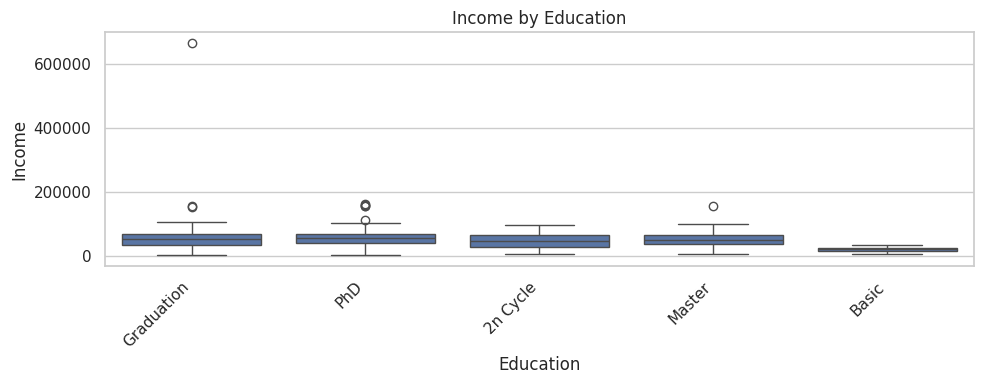

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Marital_Status', ylabel='Income'>

Text(0.5, 1.0, 'Income by Marital Status')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Married'),
  Text(3, 0, 'Together'),
  Text(4, 0, 'Widow'),
  Text(5, 0, 'YOLO'),
  Text(6, 0, 'Alone'),
  Text(7, 0, 'Absurd')])

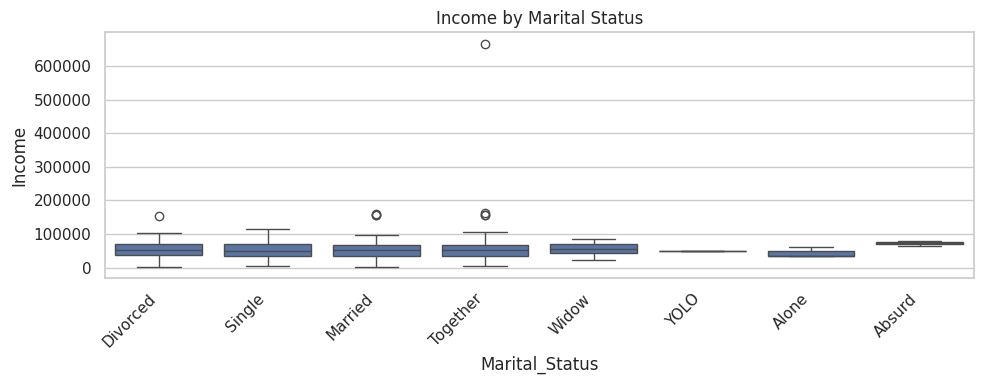

In [ ]:
# 18) Income by Education / Marital Status (if available)
if {"Income", "Education"}.issubset(df.columns):
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x="Education", y="Income")
    plt.title("Income by Education")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

if {"Income", "Marital_Status"}.issubset(df.columns):
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x="Marital_Status", y="Income")
    plt.title("Income by Marital Status")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


,Response
Education,
PhD,0.207819
Master,0.154054
Graduation,0.134871
2n Cycle,0.108374
Basic,0.037037


<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Education'>

Text(0.5, 1.0, 'Response Rate by Education')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'PhD'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'Graduation'),
  Text(3, 0, '2n Cycle'),
  Text(4, 0, 'Basic')])

Text(0, 0.5, 'Mean(Response)')

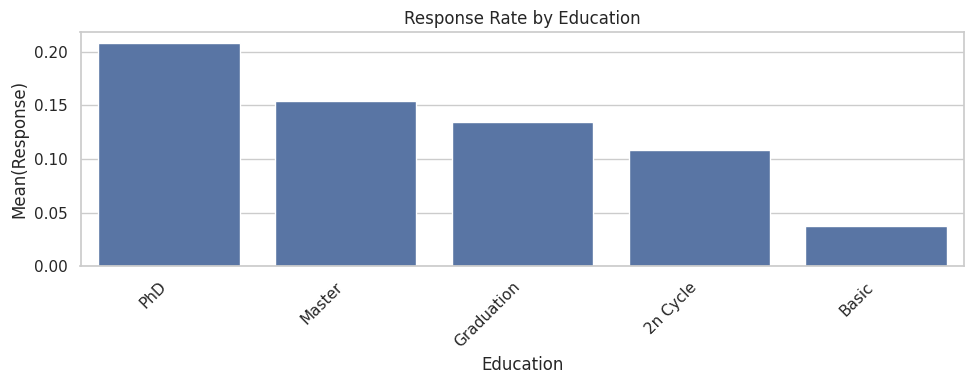

In [ ]:
# 19) Response rate across categories (if Response exists)
# Response is often 0/1; use mean to get response rate per group.
if {"Response", "Education"}.issubset(df.columns):
    edu_resp = df.groupby("Education")["Response"].mean().sort_values(ascending=False)
    display(edu_resp)

    plt.figure(figsize=(10, 4))
    sns.barplot(x=edu_resp.index, y=edu_resp.values)
    plt.title("Response Rate by Education")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Mean(Response)")
    plt.tight_layout()
    plt.show()


# Bivariate Analysis (Categorical vs Categorical)

Use contingency tables (crosstab) and heatmaps/stacked bars to see association patterns. [web:25]


Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.000000,0.000000,0.113300,0.399015,0.182266,0.280788,0.024631,0.000000
Basic,0.000000,0.000000,0.018519,0.370370,0.333333,0.259259,0.018519,0.000000
Graduation,0.000887,0.000887,0.105590,0.384206,0.223602,0.253771,0.031056,0.000000
Master,0.002703,0.002703,0.100000,0.372973,0.202703,0.286486,0.032432,0.000000
PhD,0.000000,0.002058,0.106996,0.395062,0.201646,0.240741,0.049383,0.004115


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Marital_Status', ylabel='Education'>

Text(0.5, 1.0, 'Education vs Marital Status (Row-normalized)')

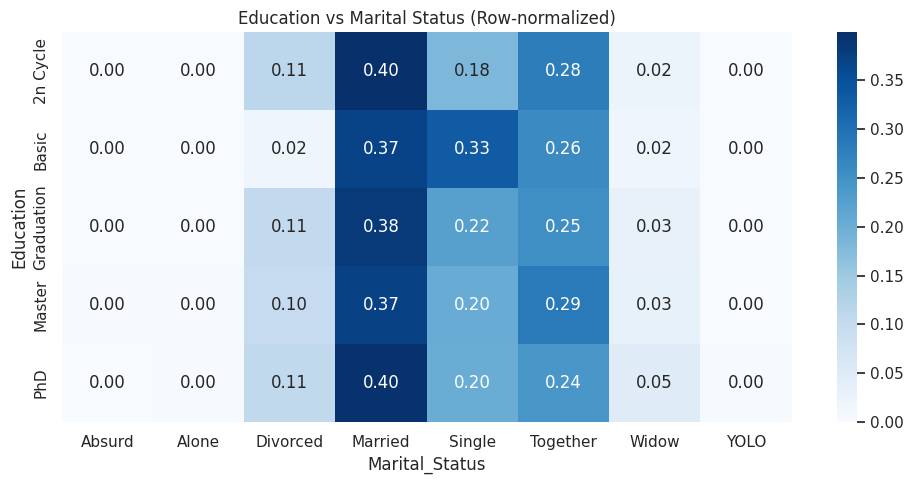

In [ ]:
# 20) Crosstab + heatmap example: Education vs Marital_Status (if available)
if {"Education", "Marital_Status"}.issubset(df.columns):
    ct = pd.crosstab(df["Education"], df["Marital_Status"], normalize="index")
    display(ct)

    plt.figure(figsize=(10, 5))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap="Blues")
    plt.title("Education vs Marital Status (Row-normalized)")
    plt.tight_layout()
    plt.show()


Response,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,0.666667,0.333333
Divorced,0.793103,0.206897
Married,0.886574,0.113426
Single,0.779167,0.220833
Together,0.896552,0.103448
Widow,0.753247,0.246753
YOLO,0.500000,0.500000


<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Response', ylabel='Marital_Status'>

Text(0.5, 1.0, 'Marital Status vs Response (Row-normalized)')

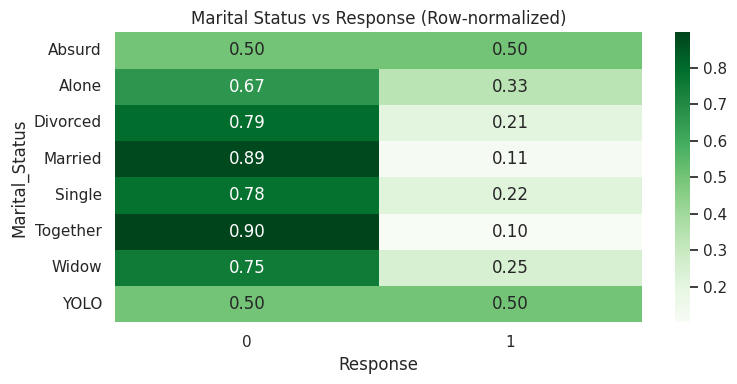

In [ ]:
# 21) Response vs Category (e.g., Marital_Status) as proportions (if available)
if {"Response", "Marital_Status"}.issubset(df.columns):
    ct_resp = pd.crosstab(df["Marital_Status"], df["Response"], normalize="index")
    display(ct_resp)

    plt.figure(figsize=(8, 4))
    sns.heatmap(ct_resp, annot=True, fmt=".2f", cmap="Greens")
    plt.title("Marital Status vs Response (Row-normalized)")
    plt.tight_layout()
    plt.show()
